## Assignment 2: Bayesian Decision Theory and Parametric Estimation
Andrés Rosso
andresrosso@gmail.com

Each example has the following structure:
$$x_i \: y_i \: C_i,$$
$$
where\:  (x_i, y_i) \: \in \:  R^{2}, and\;  C_i  \: \in \, \; \left \{   0, 1, 2\right \}
$$

In [17]:
%matplotlib inline

import numpy as np
import math
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

dataset = np.genfromtxt('data-taller2.txt', delimiter=',', dtype='f8')[1:]  
dataset = np.genfromtxt('data-taller2.txt', delimiter=',', dtype='f8')[1:]  
X_C12 = []; Y_C12 = []; 
X_C1 = []; Y_C1 = []; 
X_C2 = []; Y_C2 = []; 
C_C12 = []; 
C_C012 = []; 
X_C0 = []; Y_C0 = []; 
X_C012 = []; Y_C012 = []; 
#Separate examples in clases
for row in dataset:
    if row[2]==0:
        X_C0.append(row[0])
        Y_C0.append(row[1])
        X_C012.append(row[0])
        Y_C012.append(row[1])
        C_C012.append(0)
    if row[2]==1:
        X_C12.append(row[0])
        Y_C12.append(row[1])
        X_C012.append(row[0])
        Y_C012.append(row[1])
        X_C1.append(row[0])
        Y_C1.append(row[1])
        C_C12.append(1)
        C_C012.append(1)
    if row[2]==2:
        X_C12.append(row[0])
        Y_C12.append(row[1])
        X_C2.append(row[0])
        Y_C2.append(row[1])
        C_C12.append(2)
        C_C012.append(2)
    
#mean_X_CO = np.mean(X_C0); mean_Y_CO = np.mean(Y_C0);
mean_X_C012 = np.mean(X_C012) 
mean_Y_C012 = np.mean(Y_C012)
mean_X_C12 = np.mean(X_C12) 
mean_Y_C12 = np.mean(Y_C12)
mean_X_C0 = np.mean(X_C0) 
mean_Y_C0 = np.mean(Y_C0)
mean_X_C1 = np.mean(X_C1) 
mean_Y_C1 = np.mean(Y_C1)
mean_X_C2 = np.mean(X_C2) 
mean_Y_C2 = np.mean(Y_C2)

## 1.

### a - b. Use the data for classes 1 and 2 to estimate the parameters of a bivariate Gaussian distribution for each class. Assume that the covariance matrix is the same for both classes

$$ E[L]=\mu =[\mu_1,\mu_2,...,\mu_d]^{^{T}}$$

#### Estimation of the mean m
The maximum likelihood estimator for the mean is the sample mean:

Mean of X in C1 and C2 = 8.068534165
Mean of Y in C1 and C2 = 4.76211675


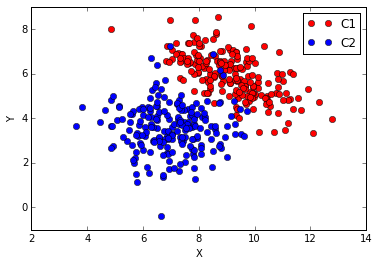

Data from C1 and C2 Centered by mean


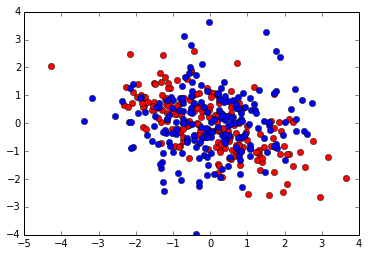

In [20]:
#parameter mean
print("Mean of X in C1 and C2 = "+str(mean_X_C12))
print("Mean of Y in C1 and C2 = "+str(mean_Y_C12))

plt.plot(X_C1, Y_C1, 'ro', label='C1')
plt.plot(X_C2, Y_C2, 'bo', label='C2')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

print("Data from C1 and C2 Centered by mean")
plt.plot(X_C1-mean_X_C1, Y_C1-mean_Y_C1, 'ro',X_C2-mean_X_C2, Y_C2-mean_Y_C2, 'bo')
plt.show()

#### Estimation of the Covariance
The estimator for covariance matrix is the sample covariance matrix:


In [21]:
#parameter covariance
X_C12_CENTERED = np.concatenate( [ (X_C1-mean_X_C1) ,  (X_C2-mean_X_C2) ] )
Y_C12_CENTERED = np.concatenate( [ (Y_C1-mean_Y_C1) ,  (Y_C2-mean_Y_C2) ] )
COV_C12_CENTERED = [[0, 0], [0, 0]]

print("* Covariance matrix of X, Y for C1, C2")
C12_XY_MATRIX = np.column_stack((X_C12_CENTERED, Y_C12_CENTERED))
COV_C12_CENTERED = np.cov( np.transpose(C12_XY_MATRIX) ) 
print(COV_C12_CENTERED)

* Covariance matrix of X, Y for C1, C2
[[ 1.45036556 -0.38915393]
 [-0.38915393  1.10369053]]


####Verify Graphicaly the parameter estimation


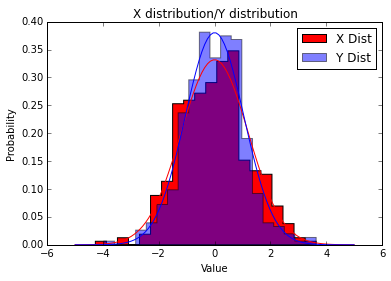

In [22]:
plt.hist(X_C12_CENTERED, bins=20, histtype='stepfilled', normed=True, color='r', label='X Dist')
plt.hist(Y_C12_CENTERED, bins=20, histtype='stepfilled', normed=True, color='b', alpha=0.5,  label='Y Dist')
plt.title("X distribution/Y distribution")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
mean = np.mean(X_C12_CENTERED)
variance = np.var(X_C12_CENTERED)
sigma = math.sqrt(variance)
x = np.linspace(-5,5,100)
plt.plot(x,mlab.normpdf(x,mean,sigma), color='r')
mean = np.mean(Y_C12_CENTERED)
variance = np.var(Y_C12_CENTERED)
sigma = math.sqrt(variance)
y = np.linspace(-5,5,100)
plt.plot(y,mlab.normpdf(y,mean,sigma), color='b')

### c. Discriminant Function

In [23]:
#CALCULATE THE DISCRIMINAT FUNCTIONS
def discriminantFunction(x, m, cov):
    x_v=np.transpose(np.matrix(x))
    m_v=np.transpose(np.matrix(m))
    x_m=x_v-m_v
    g_x = (-1/2)*np.transpose(x_m)*np.linalg.inv(cov)*(x_m)
    #print(x_m)
    return g_x

###d. Plot Class Regions

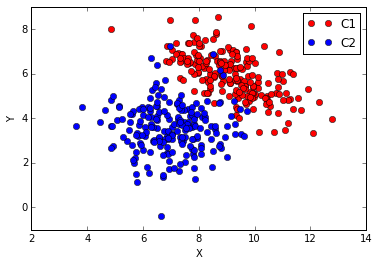

In [25]:
plt.plot(X_C1, Y_C1, 'ro', label='C1')
plt.plot(X_C2, Y_C2, 'bo', label='C2')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

### e. Boundary Line

x1: (100,)
x2: (100,)


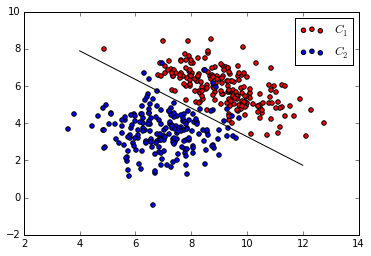

In [26]:
SigmaInv = np.linalg.inv(COV_C12_CENTERED)
muC1 = np.matrix( [[mean_X_C1], [mean_Y_C1]] )
muC2 = np.matrix( [[mean_X_C2], [mean_Y_C2]] )
[a, b] = np.dot(SigmaInv, muC1) - np.dot(SigmaInv, muC2)
x2F = lambda x1 : 1/b * (1.0/2.0 * np.dot(np.dot(muC1.T, SigmaInv), muC1) - 1.0/2.0 * np.dot(np.dot(muC2.T, SigmaInv), muC2) - a*x1)
x1 = np.linspace(4, 12, 100)
x2 = x2F(x1)
plt.scatter(X_C1, Y_C1, c="red", marker="o",label='$C_1$')
plt.scatter(X_C2, Y_C2, c="blue", marker="o",label='$C_2$')
plt.legend()
x22=x2.T.A1
print("x1: "+str(x1.shape) )
print("x2: "+str(x22.T.shape) )
plt.plot(x1,x22, color="black")
plt.show()

The boundary line is obtained when the discriminator function is equal to cero. This means the classificator cannot take any decision based on p(c|x) because the probality for c1 and for c2 would by the same.

### f. What happens with the boundary line if we change the prior probabilities of the classes? Illustrate with a graphical example.

The linear discriminant change its positions.

x1: (100,)
x2: (100,)


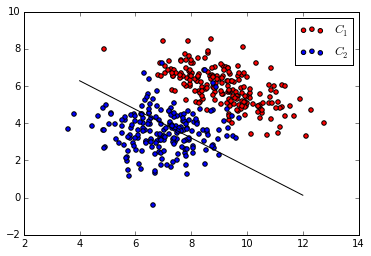

In [27]:
SigmaInv = np.linalg.inv(COV_C12_CENTERED)
muC1 = np.matrix( [[mean_X_C1], [mean_Y_C1]] )
muC2 = np.matrix( [[mean_X_C2], [mean_Y_C2]] )
[a, b] = np.dot(SigmaInv, muC1) - np.dot(SigmaInv, muC2)
x2F = lambda x1 : 1/b * (1.0/2.0 * np.dot(np.dot(muC1.T, SigmaInv), muC1) - 1.0/2.0 * np.dot(np.dot(muC2.T, SigmaInv), muC2) - a*x1) +  (np.log(0.2)) 
x1 = np.linspace(4, 12, 100)
x2 = x2F(x1)
plt.scatter(X_C1, Y_C1, c="red", marker="o",label='$C_1$')
plt.scatter(X_C2, Y_C2, c="blue", marker="o",label='$C_2$')
plt.legend()
x22=x2.T.A1
print("x1: "+str(x1.shape) )
print("x2: "+str(x22.T.shape) )
plt.plot(x1,x22, color="black")
plt.show()

In [37]:
#TESTING THE DICHOTOMIZER
PC1_C12 = []; PC2_C12 = []; success = 0; errors = 0;
for t in range(0, len(X_C12) ):
    data = [X_C12[t],Y_C12[t]]
    valC1 = discriminantFunction(data,[mean_X_C1, mean_Y_C1],COV_C12_CENTERED)
    PC1_C12.append(valC1.flat[0])
    valC2 = discriminantFunction(data,[mean_X_C2, mean_Y_C2],COV_C12_CENTERED)
    PC2_C12.append(valC2.flat[0])
    
    if(valC1>valC2):
       if(C_C12[t]==1):
           success = success+1
       else:
           errors = errors+1
    else:
        if(C_C12[t]==2):
            success = success+1
        else:
            errors = errors+1
            
print("[1] Number of Errors: "+str(errors)+", Number of success: "+str(success))

[1] Number of Errors: 13, Number of success: 387


## 2. Repeat steps (a) to (d) from previous item, but this time:

###(a) Use data from the three classes.
###(b) Estimate a different covariance matrix for each class.

#### a - b. Estimate The parameters

Mean of X in C0 = 3.80054372864
Mean of Y in C0 = 5.08239955779
Mean of X in C1 = 9.13579929
Mean of Y in C1 = 5.94377044
Mean of X in C2 = 7.00126904
Mean of Y in C2 = 3.58046306


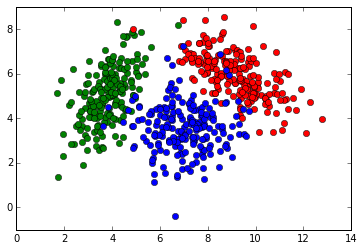

* Covariance matrix of X, Y for C0
[[ 0.61676672  0.54788897]
 [ 0.54788897  1.58649006]]
* Covariance matrix of X, Y for C1
[[ 1.55806041 -0.79318373]
 [-0.79318373  1.02515679]]
* Covariance matrix of X, Y for C2
[[ 1.34995897  0.01292031]
 [ 0.01292031  1.18777045]]


In [31]:
print("Mean of X in C0 = "+str(mean_X_C0))
print("Mean of Y in C0 = "+str(mean_Y_C0))
print("Mean of X in C1 = "+str(mean_X_C1))
print("Mean of Y in C1 = "+str(mean_Y_C1))
print("Mean of X in C2 = "+str(mean_X_C2))
print("Mean of Y in C2 = "+str(mean_Y_C2))

plt.plot(X_C0, Y_C0, 'go', X_C1, Y_C1, 'ro', X_C2, Y_C2, 'bo')
plt.show()

#parameter covariance    
print("* Covariance matrix of X, Y for C0")
COV_C0 = np.cov( np.transpose(np.column_stack((X_C0, Y_C0))) ) 
print(COV_C0)
print("* Covariance matrix of X, Y for C1")
COV_C1 = np.cov( np.transpose(np.column_stack((X_C1, Y_C1))) )
print(COV_C1) 
print("* Covariance matrix of X, Y for C2")
COV_C2 = np.cov( np.transpose(np.column_stack((X_C2, Y_C2))) ) 
print(COV_C2)

### c - d. Write the Discriminant Function and Plor Regions

In [40]:
PC0_C012 = [];PC1_C012 = [];PC2_C012 = [];success=0;errors=0;
#CALCULATE THE DISCRIMINAT FUNCTIONS
def discriminantFunction2(x, m, cov):
    x_v=np.transpose(np.matrix(x))
    m_v=np.transpose(np.matrix(m))
    x_m=x_v-m_v
    wio = ((-1/2)*(np.transpose(m_v))*np.linalg.inv(cov)*(m_v)) - ((1/2)*np.log(np.linalg.det(cov))) 
    Wi = (-1/2)*np.linalg.inv(cov)
    wi = np.linalg.inv(cov)*m_v
    g_x = np.transpose(x_m)*Wi*x_m + np.transpose(wi)*x_v + wio
    return g_x

#TESTING THE POLYTOMIZER
for t in range(0, len(X_C012) ):
    data = [X_C012[t],Y_C012[t]]
    valC0 = discriminantFunction2(data,[mean_X_C0, mean_Y_C0],COV_C0)
    PC0_C012.append(valC0.flat[0])
    valC1 = discriminantFunction2(data,[mean_X_C1, mean_Y_C1],COV_C1)
    PC1_C012.append(valC1.flat[0])
    valC2 = discriminantFunction2(data,[mean_X_C2, mean_Y_C2],COV_C2)
    PC2_C012.append(valC2.flat[0])
    if(valC0>valC1 and valC0>valC2):
       if(C_C012[t]==0):
           success = success+1
       else:
           errors = errors+1
    if(valC1>valC0 and valC1>valC2):
       if(C_C012[t]==1):
           success = success+1
       else:
           errors = errors+1
    if(valC2>valC0 and valC2>valC1):
       if(C_C012[t]==2):
           success = success+1
       else:
           errors = errors+1    
print("[2] Number of Errors: "+str(errors)+", Number of success: "+str(success))

[2] Number of Errors: 84, Number of success: 315


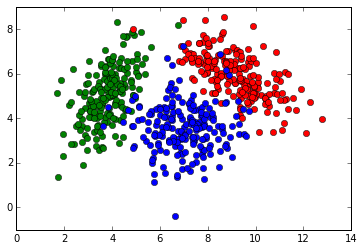

In [42]:
plt.plot(X_C0, Y_C0, 'go', X_C1, Y_C1, 'ro', X_C2, Y_C2, 'bo')
plt.show()

##3. Repeat the previous item, but this time:
###(a) Use only a portion of the dataset (80% of the samples) to estimate the parameters of the probability distribution functions of each class.
###(b) Write a function that calculates the discriminant function for each class, taking into account the possibility of rejection with a cost λ and cost 1 for misclassification ([Alp10] Eq. (3.10)).
###(c) Classify the rest of the dataset that was not used for estimation (20%), using a classifier based on the discriminant functions. Evaluate the results using a confusion matrix.

In [50]:
train_ratio = 0.8
train_num = round(train_ratio*len(X_C0));
X_C0_TRAIN = []; Y_C0_TRAIN = []; 
X_C1_TRAIN = []; Y_C1_TRAIN = [];
X_C2_TRAIN = []; Y_C2_TRAIN = []; 
X_C012_VAL = []; Y_C012_VAL = []; 
C_C012_VAL = []; 


for t in range(0, len(X_C0) ):
    if( t < train_num ):
        X_C0_TRAIN.append(X_C0[t])
        Y_C0_TRAIN.append(Y_C0[t])
    else:
        X_C012_VAL.append(X_C0[t])
        Y_C012_VAL.append(Y_C0[t])
        C_C012_VAL.append(0)

for t2 in range(0, len(X_C1) ):
    if( t2 < train_num ):
        X_C1_TRAIN.append(X_C1[t2])
        Y_C1_TRAIN.append(Y_C1[t2])
    else:
        X_C012_VAL.append(X_C1[t2])
        Y_C012_VAL.append(Y_C1[t2])
        C_C012_VAL.append(1)

for t3 in range(0, len(X_C2) ):
    if( t3 < train_num ):
        X_C2_TRAIN.append(X_C2[t3])
        Y_C2_TRAIN.append(Y_C2[t3])
    else:
        X_C012_VAL.append(X_C2[t3])
        Y_C012_VAL.append(Y_C2[t3])
        C_C012_VAL.append(2)
    
mean_X_C0 = np.mean(X_C0_TRAIN) 
mean_Y_C0 = np.mean(Y_C0_TRAIN)
mean_X_C1 = np.mean(X_C1_TRAIN) 
mean_Y_C1 = np.mean(Y_C1_TRAIN)
mean_X_C2 = np.mean(X_C2_TRAIN) 
mean_Y_C2 = np.mean(Y_C2_TRAIN)

###a - b. Estimate The parameters

In [51]:
#parameter mean
print("Mean of X in C0 = "+str(mean_X_C0))
print("Mean of Y in C0 = "+str(mean_Y_C0))
print("Mean of X in C1 = "+str(mean_X_C1))
print("Mean of Y in C1 = "+str(mean_Y_C1))
print("Mean of X in C2 = "+str(mean_X_C2))
print("Mean of Y in C2 = "+str(mean_Y_C2))


#parameter covariance    
print("* Covariance matrix for TRAINNING 80% of X, Y for C0, C1, C2")
COV_C0 = np.cov( np.transpose(np.column_stack((X_C0_TRAIN, Y_C0_TRAIN))) ) 
COV_C1 = np.cov( np.transpose(np.column_stack((X_C1_TRAIN, Y_C1_TRAIN))) ) 
COV_C2 = np.cov( np.transpose(np.column_stack((X_C2_TRAIN, Y_C2_TRAIN))) ) 
print(COV_C0)
print(COV_C1)
print(COV_C2)
PC0_C012 = [];PC1_C012 = [];PC2_C012 = [];
success=0;errors=0;

Mean of X in C0 = 3.80995598113
Mean of Y in C0 = 5.04006118868
Mean of X in C1 = 9.07805630189
Mean of Y in C1 = 5.98479971698
Mean of X in C2 = 6.96624069811
Mean of Y in C2 = 3.57871820126
* Covariance matrix for TRAINNING 80% of X, Y for C0, C1, C2
[[ 0.63491484  0.57239574]
 [ 0.57239574  1.65459309]]
[[ 1.58023263 -0.75521359]
 [-0.75521359  1.00108774]]
[[ 1.35826219  0.02210713]
 [ 0.02210713  1.29538861]]


### c - d Write Discriminant Function and Graph Regios


[3] Number of Errors: 96, Number of success: 148


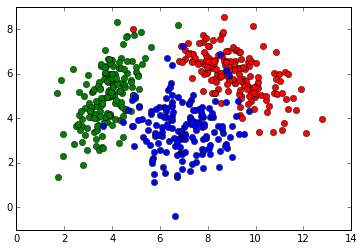

Confusion Matrix
[[23 17  0]
 [ 0 41  0]
 [ 2 29 10]]


In [53]:
err_0_1=0;err_0_2=0;
err_1_0=0;err_1_2=0;
err_2_1=0;err_2_0=0;
succ_0_0=0;succ_1_1=0;succ_2_2=0;


for t in range(0, len(X_C012_VAL) ):
    data = [X_C012_VAL[t],Y_C012_VAL[t]]
    valC0 = discriminantFunction3(data,[mean_X_C0, mean_Y_C0],COV_C0,0.3)
    valC1 = discriminantFunction3(data,[mean_X_C1, mean_Y_C1],COV_C1,0.3)
    valC2 = discriminantFunction3(data,[mean_X_C2, mean_Y_C2],COV_C2,0.3)

    if(valC0>valC1 and valC0>valC2):
       if(C_C012_VAL[t]==0):
           success = success+1
           succ_0_0 = succ_0_0+1;
       else:
           if(C_C012_VAL[t]==1):
               err_1_0 = err_1_0+1
           if(C_C012_VAL[t]==2):
               err_2_0 = err_2_0+1
           errors = errors+1
    if(valC1>valC0 and valC1>valC2):
       if(C_C012_VAL[t]==1):
           success = success+1
           succ_1_1 = succ_1_1+1;
       else:
           if(C_C012_VAL[t]==0):
               err_0_1 = err_0_1+1
           if(C_C012_VAL[t]==2):
               err_2_1 = err_2_1+1
           errors = errors+1
    if(valC2>valC0 and valC2>valC1):
       if(C_C012_VAL[t]==2):
           success = success+1
           succ_2_2 = succ_2_2+1;
       else:
           if(C_C012_VAL[t]==0):
               err_0_2 = err_0_2+1
           if(C_C012_VAL[t]==1):
               err_1_2 = err_1_2+1
           errors = errors+1    
print("[3] Number of Errors: "+str(errors)+", Number of success: "+str(success))

confMatrix = np.matrix( [[succ_0_0,err_0_1,err_0_2],[err_1_0,succ_1_1,err_1_2],[err_2_0,err_2_1,succ_2_2]] )


plt.plot(X_C0_TRAIN, Y_C0_TRAIN, 'go', X_C1_TRAIN, Y_C1_TRAIN, 'ro', X_C2_TRAIN, Y_C2_TRAIN, 'bo')
plt.show()
print("Confusion Matrix")
print(confMatrix)
